In [136]:
import numpy as np

In [34]:
from meteostat import Stations, Daily

In [168]:
stations = Stations()
stations = stations.nearby(40.4168, -3.7038)
station = stations.fetch(10)

In [169]:
print(station)

                             name country region    wmo  icao  latitude  \
id                                                                        
08222                      Madrid      ES      M  08222  <NA>   40.4167   
08223     Madrid / Cuatro Vientos      ES      M  08223  LEVS   40.3833   
08224             Madrid / Getafe      ES      M  08224  LEGT   40.3000   
08221            Madrid / Barajas      ES      M  08221  LEMD   40.4500   
LEMM0  Madrid / Barajas de Madrid      ES      M   <NA>  LEMM   40.5000   
08227           Madrid / Torrejon      ES      M  08227  LETO   40.4833   
08219              Madri-Colmenar      ES      M  08219  LECV   40.6500   
08215                 Navacerrada      ES     CL  08215  <NA>   40.7833   
08226                 Guadalajara      ES     CM  08226  <NA>   40.6667   
08272                      Toledo      ES     CM  08272  <NA>   39.8833   

       longitude  elevation       timezone hourly_start hourly_end  \
id                           

In [79]:
from datetime import datetime
import matplotlib.pyplot as plt

In [180]:
start = datetime(1931, 5, 1)
end = datetime(1931, 10, 1)
data = Daily('08221', start, end)
data = data.fetch()
print(data)

Empty DataFrame
Columns: [tavg, tmin, tmax, prcp, snow, wdir, wspd, wpgt, pres, tsun]
Index: []


In [171]:
def counting (data):
    count = 0
    for i in range(data.shape[0]):
        if data.iloc[i]['tmax'] >= 35:
            count += 1
    return count

def mean(data):
    mean_max = 0
    mean_min = 0
    for i in range(data.shape[0]):
        mean_max += data.iloc[i]['tmax']
        mean_min += data.iloc[i]['tmin']

    return mean_max/data.shape[0], mean_min/data.shape[0]

def max_tem(data):
    temp = []
    for i in range(data.shape[0]):
        temp.append(data.iloc[i]['tmax'])

    return temp

In [179]:
number_of_days = []
years = []
mean_max = []
mean_min = []
max_temp = []

for i in range(1951, 2023):
    start = datetime(i, 1, 1)
    end = datetime(i, 12, 31)
    data = Daily('08221', start, end)
    data = data.fetch()
    print(f'{i} number of days over 30: {counting(data)}')
    print(f'{i} Mean Temperature: {mean(data)[0]}')
    number_of_days.append(counting(data))
    years.append(i)
    mean_max.append(mean(data)[0])
    mean_min.append(mean(data)[1])
    max_temp.append(max_tem(data))

1951 number of days over 30: 0
1951 Mean Temperature: nan
1952 number of days over 30: 0
1952 Mean Temperature: nan
1953 number of days over 30: 0
1953 Mean Temperature: nan
1954 number of days over 30: 0
1954 Mean Temperature: nan
1955 number of days over 30: 0
1955 Mean Temperature: nan
1956 number of days over 30: 0
1956 Mean Temperature: nan
1957 number of days over 30: 0
1957 Mean Temperature: nan
1958 number of days over 30: 0
1958 Mean Temperature: nan
1959 number of days over 30: 0
1959 Mean Temperature: nan
1960 number of days over 30: 0
1960 Mean Temperature: nan
1961 number of days over 30: 14
1961 Mean Temperature: 21.47041095890411
1962 number of days over 30: 29
1962 Mean Temperature: 20.68602739726027
1963 number of days over 30: 8
1963 Mean Temperature: 19.364657534246568
1964 number of days over 30: 16
1964 Mean Temperature: 20.77377049180327
1965 number of days over 30: 18
1965 Mean Temperature: 19.889560439560444
1966 number of days over 30: 19
1966 Mean Temperature:

In [181]:
print(len(max_temp))

72


In [182]:
probs = []
for i in max_temp:
    count = 0
    p = 0
    for j in i:
        if j >= 30.0:
            count += 1

        p = count/ len(i) * 100
    probs.append(p)

In [183]:
print(probs)

[5.752212389380531, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 24.65753424657534, 25.753424657534246, 13.698630136986301, 23.497267759562842, 20.87912087912088, 19.45205479452055, 17.80821917808219, 17.48633879781421, 16.164383561643834, 23.28767123287671, 15.616438356164384, 16.120218579234972, 17.80821917808219, 19.17808219178082, 17.26027397260274, 16.666666666666664, 14.246575342465754, 18.904109589041095, 19.45205479452055, 22.131147540983605, 21.095890410958905, 18.904109589041095, 22.19178082191781, 17.48633879781421, 23.28767123287671, 21.643835616438356, 23.013698630136986, 18.852459016393443, 22.465753424657535, 26.027397260273972, 24.93150684931507, 20.76502732240437, 16.71232876712329, 24.65753424657534, 20.273972602739725, 21.03825136612022, 17.80821917808219, 22.19178082191781, 20.54794520547945, 21.85792349726776, 20.273972602739725, 19.17808219178082, 23.28767123287671, 24.043715846994534, 28.493150684931507, 28.767123287671232, 19.45205479452055, 21.584699453551913, 

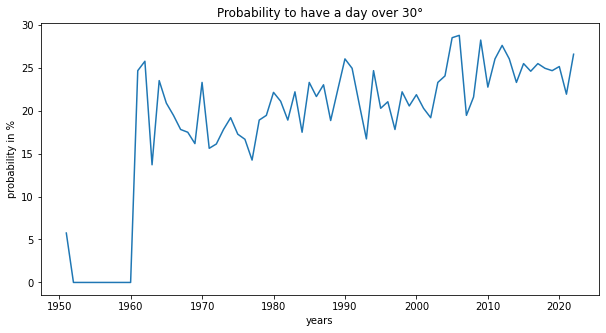

In [184]:
plt.figure(figsize=(10, 5))
plt.plot(years, probs)

plt.title(f'Probability to have a day over 30°')
plt.xlabel('years')
plt.ylabel('probability in %')
plt.show()

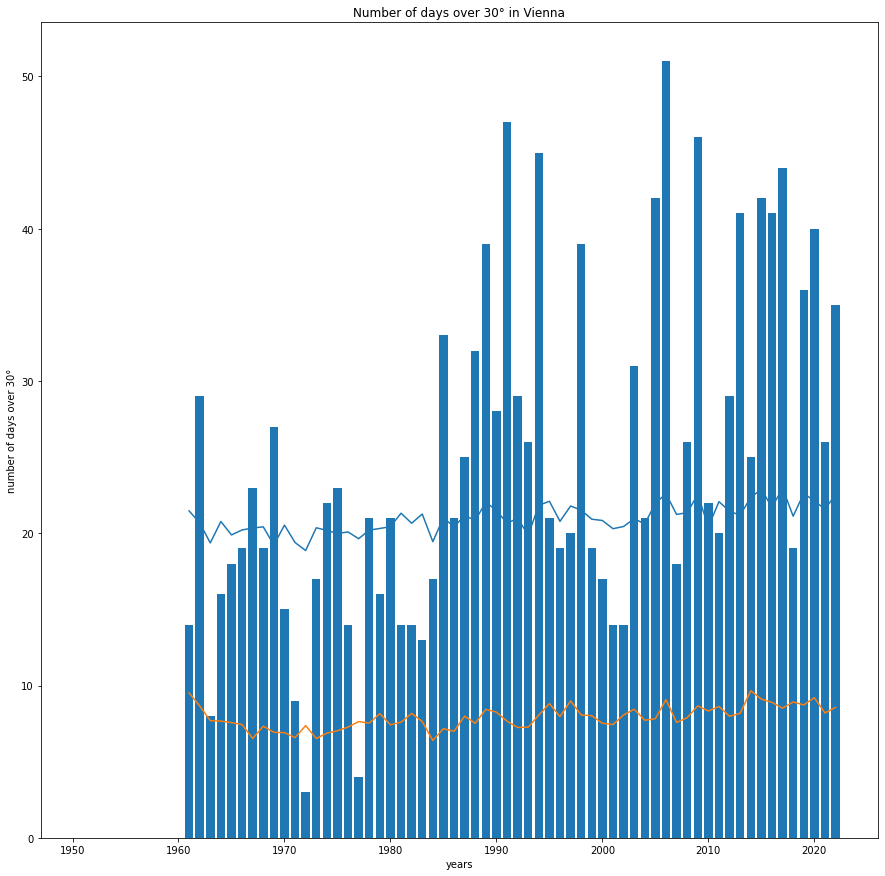

In [185]:
plt.figure(figsize=(15, 15))
plt.bar(years, number_of_days)
plt.plot(years, mean_max)
plt.plot(years, mean_min)

plt.title(f'Number of days over 30° in Vienna')
plt.xlabel('years')
plt.ylabel('number of days over 30°')
plt.show()